# 서울시 범죄 현황 분석 - 2019년

In [235]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [190]:
df = pd.read_csv('./data/서울시 5대범죄 발생현황(2019).tsv', sep='\t', thousands=',', encoding='utf-8', header=1)
df.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [191]:
del df['기간']
df.drop([0], inplace=True)
df.rename({
    '자치구': '구별',
    '발생.1': '살인발생', '검거.1': '살인검거',
    '발생.2': '강도발생', '검거.2': '강도검거',
    '발생.3': '강간발생', '검거.3': '강간검거',
    '발생.4': '절도발생', '검거.4': '절도검거',
    '발생.5': '폭력발생', '검거.5': '폭력검거'
    }, inplace=True, axis=1)
df.set_index('구별', inplace=True)
df.head()

,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
구별,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [192]:
df['살인검거율'] = df['살인검거'] / df['살인발생'] * 100
df['강도검거율'] = df['강도검거'] / df['강도발생'] * 100
df['강간검거율'] = df['강간검거'] / df['강간발생'] * 100
df['절도검거율'] = df['절도검거'] / df['절도발생'] * 100
df['폭력검거율'] = df['폭력검거'] / df['폭력발생'] * 100

del df['살인검거']
del df['강도검거']
del df['강간검거']
del df['절도검거']
del df['폭력검거']
df.head()

,발생,검거,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3313,2611,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,2512,1838,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4011,2816,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [193]:
df.rename(columns={'살인발생': '살인',
                    '강도발생': '강도',
                    '강간발생': '강간',
                    '절도발생': '절도',
                    '폭력발생': '폭력'}, inplace=True)

con_list = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
for column in con_list:
    df.loc[df[column] > 100, column] = 100

df.head()

,발생,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3313,2611,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,2512,1838,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4011,2816,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [194]:
df.to_csv('../input/Seoul/crime_result.csv', sep=',', encoding='utf8')

### 데이터 정규화

In [195]:
from sklearn import preprocessing

col = ['살인', '강도', '강간', '절도', '폭력']
x = df[col].values
min_max_scalar = preprocessing.MinMaxScaler()

x_scaled = min_max_scalar.fit_transform(x.astype(float))
df_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)

col2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
df_norm[col2] = df[col2]
df_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967


In [196]:
cctv = pd.read_csv('../input/Seoul/cctv_result.csv', sep=',', encoding='utf-8')
cctv.head()

,구별,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [197]:
tmp = pd.DataFrame({
    '구별': cctv['구별'],
    '인구수': cctv['인구수'],
    'CCTV': cctv['cctv소계']
})
tmp.head()

,구별,인구수,CCTV
0,강남구,544085,5221
1,강동구,462275,1879
2,강북구,313550,1265
3,강서구,589536,1617
4,관악구,514555,3985


In [198]:
df_norm = pd.merge(df_norm, tmp, on='구별')
df_norm.head()

,구별,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
0,종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471
1,중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544
2,용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063
3,성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679
4,광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581


In [199]:
col1 = ['살인', '강도', '강간', '절도', '폭력']
df_norm['범죄'] = np.sum(df_norm[col1], axis=1)
col2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
df_norm['검거'] = np.sum(df_norm[col2], axis=1)
df_norm.set_index('구별', inplace=True)
df_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,461.435216
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975,431.125118
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161,395.425187
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980,400.652278


In [200]:
df_norm.to_csv('../input/Seoul/crime_norm_result.csv', sep=',', encoding='utf8')

### 데이터 시각화

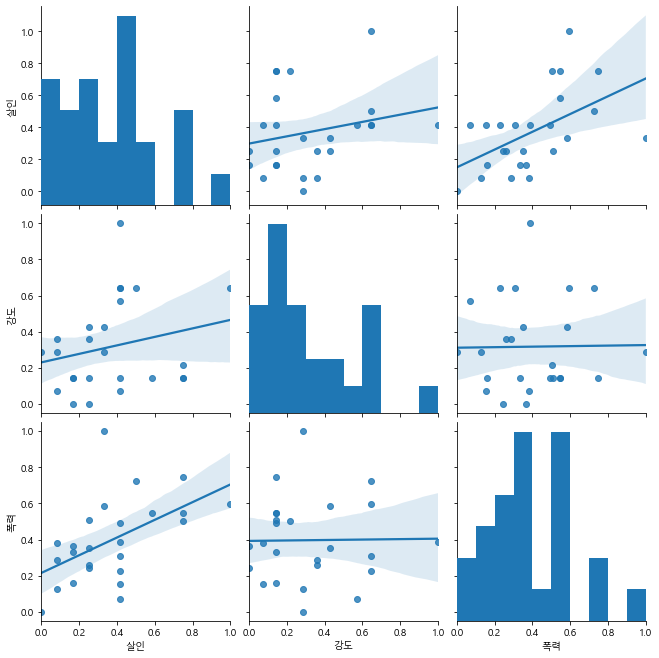

In [201]:
sns.pairplot(df_norm, vars=['살인', '강도', '폭력'], kind='reg', size=3)
plt.show()

#### 살인과 강도, 살인과 폭력 사이에는 양의 상관관계가 보이지만, 강도와 폭력 사이에는 보이지 않습니다.

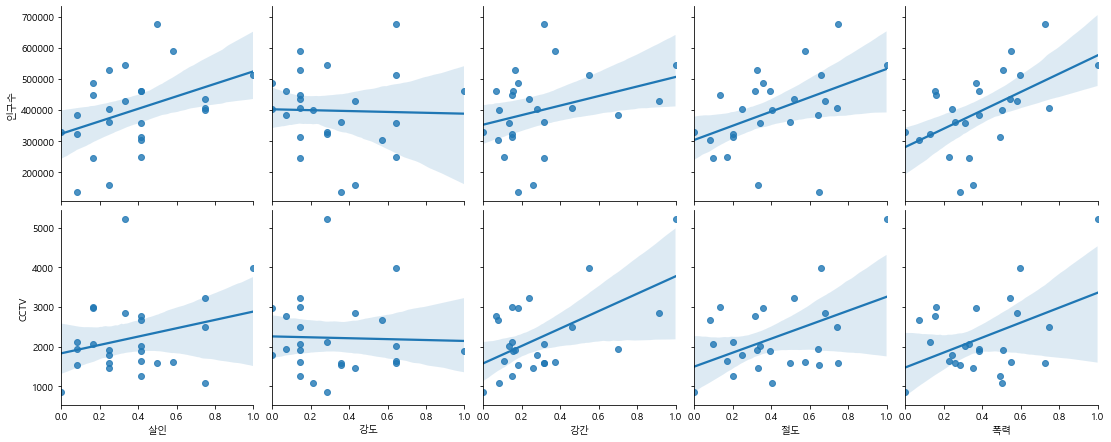

In [202]:
sns.pairplot(df_norm, 
            x_vars=['살인', '강도', '강간', '절도', '폭력'], 
            y_vars=['인구수', 'CCTV'], kind='reg', size=3)
plt.show()

#### 모든 범죄에서 대체적으로 CCTV의 개수가 적은 구간에서 높은 수를 갖는 데이터들이 보입니다.

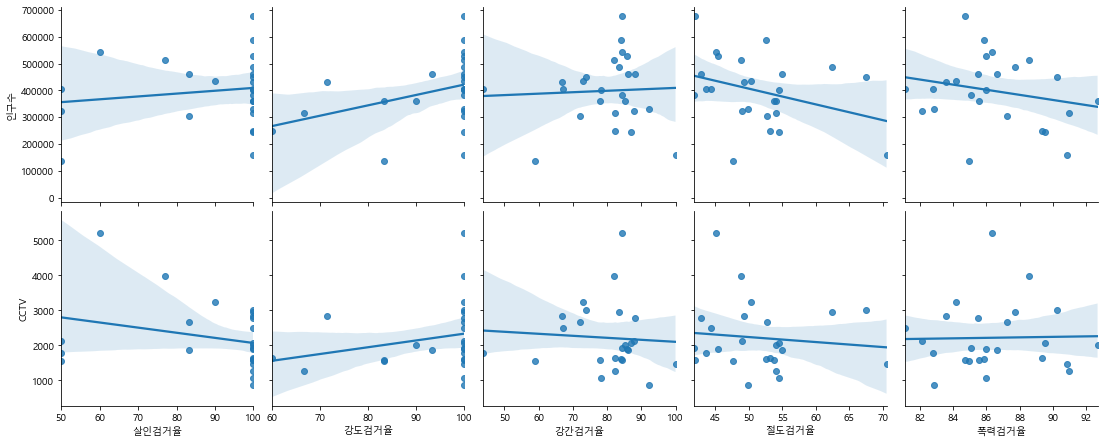

In [203]:
sns.pairplot(df_norm, 
            x_vars=['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율'], 
            y_vars=['인구수', 'CCTV'], kind='reg', size=3)
plt.show()

#### 인구수 및 CCTV는 대체적으로 범죄검거율과 양의 상관관계를 갖진 않습니다.

In [204]:
tmp_max = df_norm['검거'].max()
df_norm['검거'] = df_norm['검거'] / tmp_max * 100
df_norm_sort = df_norm.sort_values(by='검거', ascending=False)
df_norm_sort.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.0,100.0,100.000000,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.0,100.0,83.505155,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.0,100.0,73.863636,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.0,100.0,87.132353,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.0,100.0,92.222222,49.873418,82.843137,329300,858,0.285714,92.090669


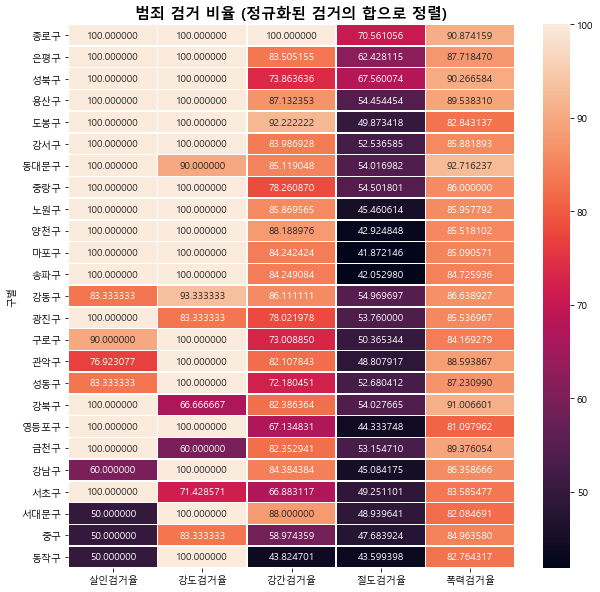

In [205]:
target_col = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']

plt.figure(figsize=(10, 10))
sns.heatmap(df_norm_sort[target_col], annot=True, fmt='f', linewidth=.5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)', fontsize=15, fontweight= 'bold')
plt.show()

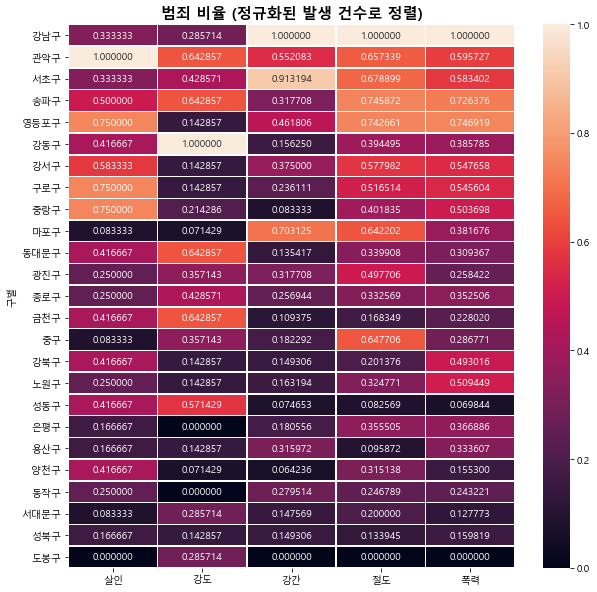

In [206]:
target_col = ['살인', '강도', '강간', '절도', '폭력']
df_norm['범죄'] = df_norm['범죄'] / 5
df_norm_sort = df_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(df_norm_sort[target_col], annot=True, fmt='f', linewidth=.5)
plt.title('범죄 비율 (정규화된 발생 건수로 정렬)', fontsize=15, fontweight= 'bold')
plt.show()

### 범죄율에 대한 지도 시각화

In [207]:
import folium
import json
geo_path = '../input/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [208]:
# 구별 살인 발생 건수를 지도 위에 표시
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str,
                data=df_norm['살인'],
                columns=[df_norm.index, df_norm['살인']],
                fill_color='PuRd',
                key_on='feature.id')
map

#### 관악, 영등포, 구로, 강서 등이 높게 나타납니다.

In [209]:
# 구별 범죄 발생 건수를 지도 위에 표시
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str,
                data=df_norm['범죄'],
                columns=[df_norm.index, df_norm['범죄']],
                fill_color='PuRd',
                key_on='feature.id')
map

#### 강남구, 관악구가 범죄 발생 건수가 가장 높은 것으로 나타납니다.

In [210]:
# 구별 인구대비 범죄 발생 건수를 지도 위에 표시
tmp_criminal = df_norm['범죄'] / df_norm['인구수'] * 1000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str,
                data=tmp_criminal,
                columns=[df_norm.index, tmp_criminal],
                fill_color='PuRd',
                key_on='feature.id')
map

#### 인구 대비 범죄 발생 건수는 종로구가 가장 높게 나타나고, 강남구 일대가 뒤를 잇는 것으로 보입니다. 

## 서울시 경찰서 정보 얻어오기

### 크롤링을 통해 관서명, 주소 얻기

In [221]:
import requests
import time
from urllib.parse import urlparse
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('./chromedriver')
driver.get('http://www.google.com/')
time.sleep(1)

search_box = driver.find_element_by_name('q')
search_box.send_keys('서울시 경찰서')
search_box.submit()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="rso"]/div[3]/div/div[1]/a/h3/span').click()
time.sleep(1)

tbody = driver.find_element_by_xpath('//*[@id="contents2"]/div[2]/div[2]/div[5]/table/tbody')
trs = tbody.find_elements_by_tag_name('tr')

name_list = []; addr_list = []; gu_list = []
for i, tr in enumerate(trs):
    name = tr.find_element_by_xpath(f'//*[@id="contents2"]/div[2]/div[2]/div[5]/table/tbody/tr[{i+1}]/td[1]').text
    addr = tr.find_element_by_xpath(f'//*[@id="contents2"]/div[2]/div[2]/div[5]/table/tbody/tr[{i+1}]/td[2]').text
    gu = addr.split()[1]
    name_list.append(name); addr_list.append(addr); gu_list.append(gu)

In [222]:
len(name_list), len(addr_list), len(gu_list)

(32, 32, 32)

In [223]:
police = pd.DataFrame({
    '구별': gu_list,
    '관서명': name_list,
    '주소': addr_list
})
police.head()

,구별,관서명,주소
0,종로구,서울지방경찰청,서울시 종로구 사직로8길 31
1,강남구,서울강남경찰서,서울시 강남구 테헤란로 114길 11
2,강동구,서울강동경찰서,서울시 강동구 성내로 57
3,강북구,서울강북경찰서,서울시 강북구 오패산로 406
4,양천구,서울강서경찰서,서울시 양천구 화곡로 73


### 위도, 경도 정보 얻어오기

In [224]:
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [225]:
lat_list = []; lng_list = []
for i in police.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + police['주소'][i]
    result = requests.get(urlparse(url).geturl(), headers={"Authorization":"KakaoAK " + kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])

    lat_list.append(lat); lng_list.append(lng)

In [226]:
len(lat_list), len(lng_list)

(32, 32)

In [227]:
police['위도'] = lat_list
police['경도'] = lng_list
police.head()

,구별,관서명,주소,위도,경도
0,종로구,서울지방경찰청,서울시 종로구 사직로8길 31,37.574881,126.971986
1,강남구,서울강남경찰서,서울시 강남구 테헤란로 114길 11,37.509367,127.067100
2,강동구,서울강동경찰서,서울시 강동구 성내로 57,37.528678,127.126957
3,강북구,서울강북경찰서,서울시 강북구 오패산로 406,37.637170,127.027042
4,양천구,서울강서경찰서,서울시 양천구 화곡로 73,37.539801,126.829982


In [228]:
police.to_csv('../input/Seoul/police_station.csv', sep=',', encoding='utf8', index=False)

### 경찰서 정보 지도 위에 표시

In [233]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)
map.choropleth(geo_data=geo_str,
                data=df_norm['범죄'],
                columns=[df_norm.index, df_norm['범죄']],
                fill_color='PuRd',
                key_on='feature.id')

for i in police.index:
    folium.Marker(
        location=[police['위도'][i], police['경도'][i]],
        popup=police['주소'][i], 
        tooltip=police['관서명'][i]
    ).add_to(map)
map

#### 대체적으로 경찰서의 수가 많은 지역이 범죄 건수가 적기는 하나, 경찰서의 수가 적은 지역임에도 범죄 건수가 낮은 지역도 찾아 볼 수 있습니다.